In [2]:
%matplotlib widget
import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
from amftrack.pipeline.functions.post_processing import *
import pandas as pd
import ast
from amftrack.plotutil import plot_t_tp1
from scipy import sparse
from datetime import datetime
from amftrack.pipeline.functions.node_id import orient
import pickle
import scipy.io as sio
from pymatreader import read_mat
from matplotlib import colors
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi
from skimage import filters
from random import choice
import scipy.sparse
import os
from amftrack.pipeline.functions.extract_graph import from_sparse_to_graph, generate_nx_graph, sparse_to_doc
from skimage.feature import hessian_matrix_det
from amftrack.pipeline.functions.experiment_class_surf import Experiment, Edge, Node, Hyphae, plot_raw_plus, get_hyphae
from amftrack.pipeline.paths.directory import run_parallel, find_state, directory_scratch, directory_project
from amftrack.notebooks.analysis.util import * 
from scipy import stats
from scipy.ndimage.filters import uniform_filter1d
from amftrack.pipeline.functions.hyphae_id_surf import get_pixel_growth_and_new_children
from collections import Counter
from IPython.display import clear_output
from amftrack.notebooks.analysis.data_info import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 20})
from amftrack.plotutil import plot_node_skel
from amftrack.notebooks.validation.util import *


directory_project = "/projects/0/einf914/to_save/"
lapse = 58
exp = get_exp((38,0,0+lapse),directory_project)
exp.directory = directory_project
# hyphaes, problems = get_hyphae(exp)
# exp.hyphaes = hyphaes

begin = 2021-08-18 13:24:00 
  end = 2021-08-23 15:24:00


findfont: Font family ['verdana'] not found. Falling back to DejaVu Sans.


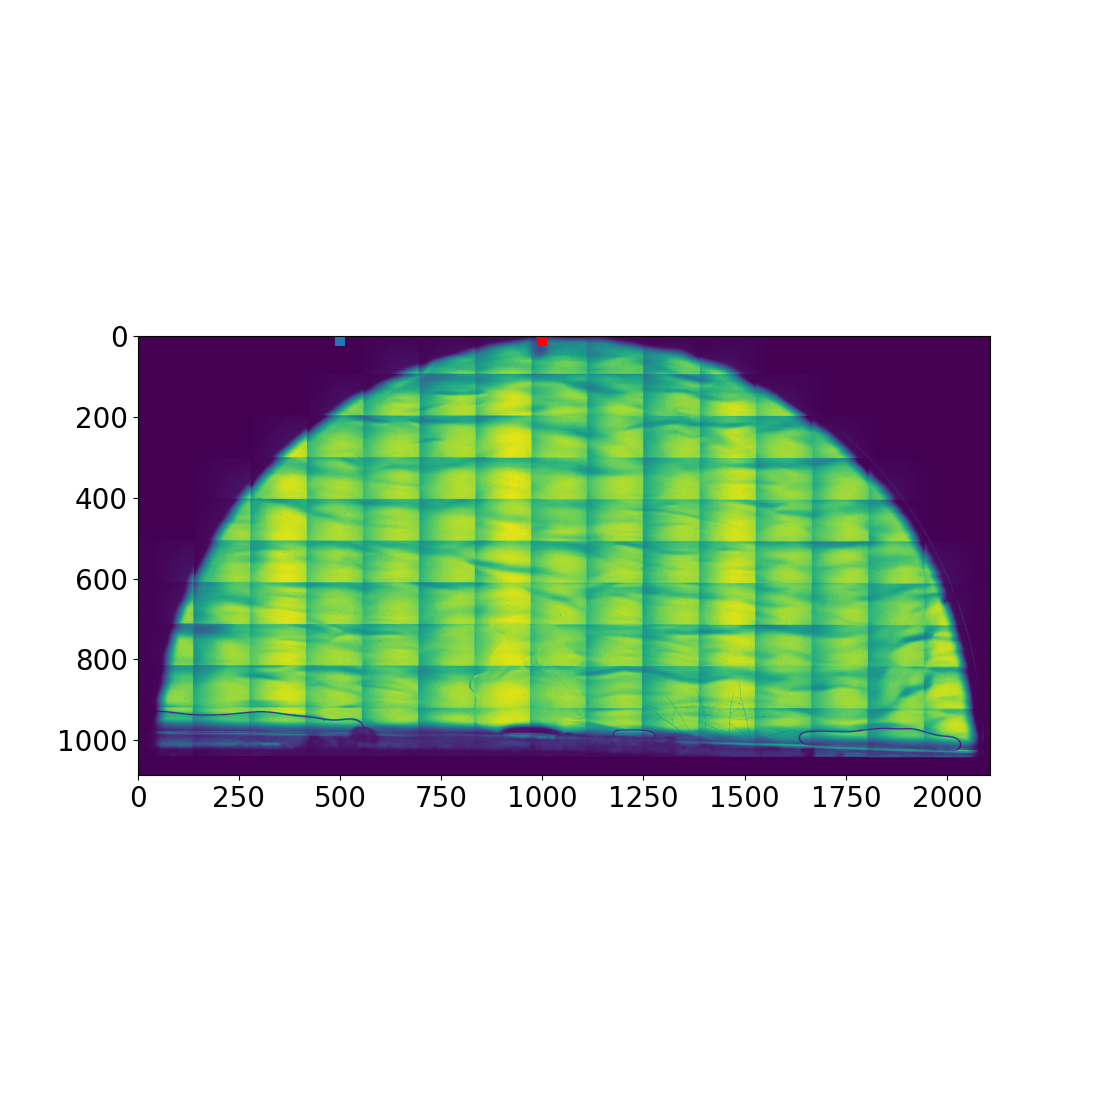

In [3]:
plt.close('all')
i=0
dist = 150
radius = 1000
compress = 25
dr_orth, dr_center = get_study_zone(exp,dist,radius,i)

In [5]:
save_study_zone(dr_orth,dr_center,exp,i)

In [18]:
dr_orth.rect.xy

(1659.7627565982405, 1018.2803519061583)

In [19]:
exp.orthog

array([0.90788694, 0.4192151 ])

In [8]:
exp.center

(26325, 26625)

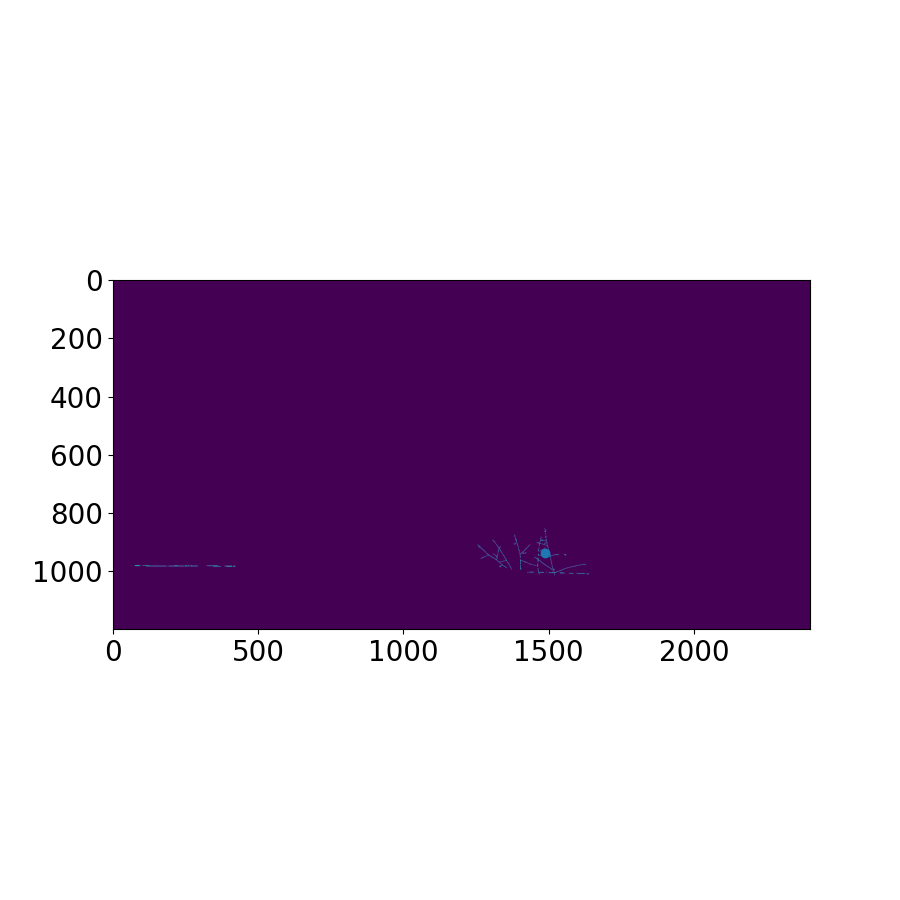

In [4]:
plt.close('all')
compress = 25
date = exp.dates[i]
directory_name = get_dirname(date,exp.plate)
path_snap = exp.directory + directory_name
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
skelet = skel['skeleton']
output = skelet.todense()
kernel = np.ones((5,5),np.uint8)
output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 3)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.imshow(cv2.resize(output,(output.shape[1]//compress,output.shape[0]//compress)),alpha = 1)
plt.scatter(exp.center[0]//compress,exp.center[1]//compress)

In [20]:
t= i
compress = 25
center = np.array(exp.center)
poss = exp.positions[t]
x0,y0 = exp.center
direction = exp.orthog
pos_line = np.array((x0,y0))+dist*compress*direction
x_line,y_line = pos_line[0],pos_line[1]
orth_direct = np.array([direction[1],-direction[0]])
x_orth,y_orth = orth_direct = orth_direct[0],orth_direct[1]
a = y_orth/x_orth
b = y_line-a*x_line
nodes_exclude = []
for node in exp.nx_graph[t].nodes:
    dist_center = np.linalg.norm(poss[node]-center)
    x,y = poss[node]
    if dist_center > radius*compress or a*x+b>y:
        nodes_exclude.append(node)


In [21]:
len(exp.nx_graph[t].nodes)
len(nodes_exclude)

88

88

In [17]:
direction

array([-0.84568984, -0.53367471])

In [8]:
b, a

(75397.38240977819, -1.5846541607669657)

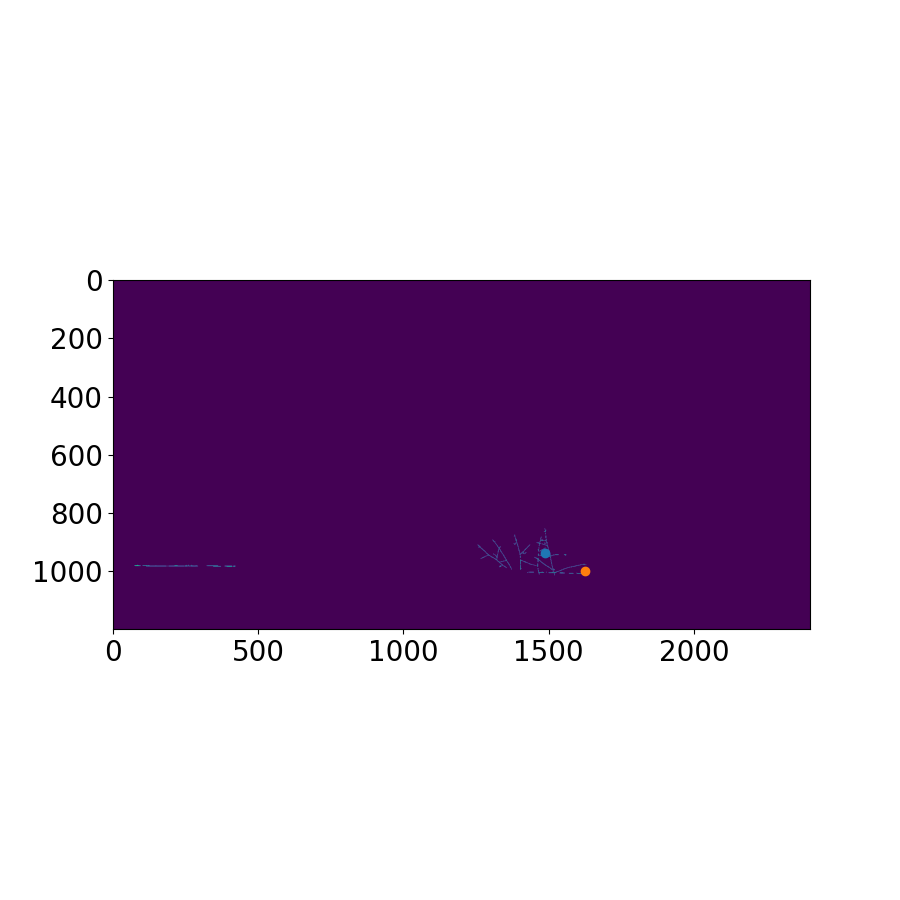

In [22]:
plt.close('all')
compress = 25
date = exp.dates[i]
directory_name = get_dirname(date,exp.plate)
path_snap = exp.directory + directory_name
skel = read_mat(path_snap + "/Analysis/skeleton_pruned_realigned.mat")
Rot = skel["R"]
trans = skel["t"]
skelet = skel['skeleton']
output = skelet.todense()
kernel = np.ones((5,5),np.uint8)
output = cv2.dilate(output.astype(np.uint8),kernel,iterations = 3)
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111)
ax.imshow(cv2.resize(output,(output.shape[1]//compress,output.shape[0]//compress)),alpha = 1)
plt.scatter(exp.center[0]//compress,exp.center[1]//compress)
plt.scatter(x_line//compress,y_line//compress)
# for node in nodes_exclude:
#     s=plt.scatter(*np.flip(poss[node])//compress)